In [ ]:
import numpy as np
import matplotlib.pyplot as plt

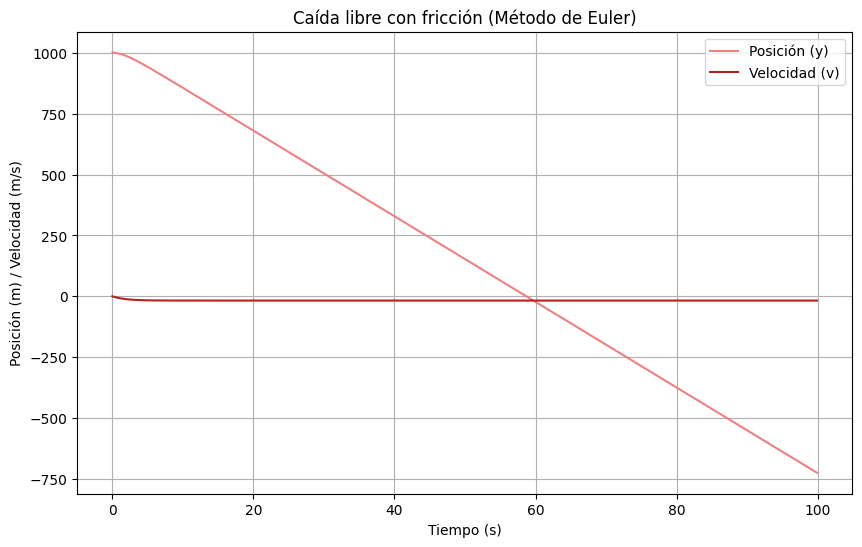

In [ ]:
def funcion(C, m, b, g):
    y, v = C
    dy_dt = v
    dv_dt = -g - (b / m) * v
    return np.array([dy_dt, dv_dt])

# Condiciones iniciales
#--------------------------------------------------------------------
m = 0.01  # masa
g = 9.8  # gravedad
dt = 0.1  # step
y0 = 1000  # y inicial
v0 = 0  # velocidad inicial
R = 1.70  # radio
eta = 0.000174  # coeficiente de viscosidad del aire (¡!)
b = 6 * np.pi * R * eta  # coeficiente de fricción
#--------------------------------------------------------------------

params = (m, b, g)
C1 = np.array([y0, v0])

tiempo = np.arange(0, 100, dt)
N = len(tiempo)

yn = np.zeros(N)
vn = np.zeros(N)

yn[0], vn[0] = C1

#--------------------------------------------------------------------
for i in range(N - 1):
    dy_dt, dv_dt = funcion([yn[i], vn[i]], *params)
    yn[i + 1] = yn[i] + dt * dy_dt
    vn[i + 1] = vn[i] + dt * dv_dt
#--------------------------------------------------------------------

# GRÁFICA
plt.figure(figsize=(10, 6))
plt.plot(tiempo, yn, label="Posición (y)", color="lightcoral")
plt.plot(tiempo, vn, label="Velocidad (v)", color="firebrick")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m) / Velocidad (m/s)")
plt.title("Caída libre con fricción (Método de Euler)")
plt.legend()
plt.grid(True)
plt.show()

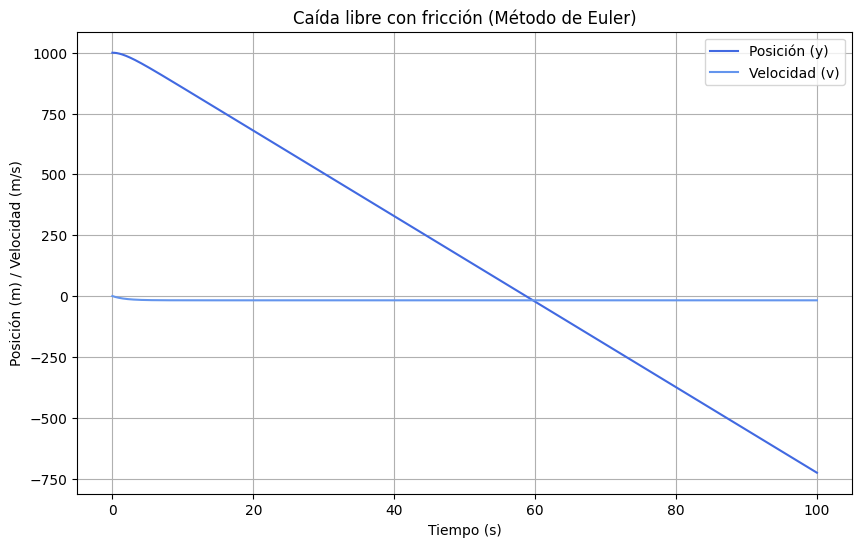

In [ ]:
def euler_method_second_order(f, x0, y0, v0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    v = np.zeros(n+1)

    x[0] = x0
    y[0] = y0
    v[0] = v0

    for i in range(n):
        dy_dx, dv_dx = f(x[i], y[i], v[i])
        y[i+1] = y[i] + h * dy_dx
        v[i+1] = v[i] + h * dv_dx
        x[i+1] = x[i] + h

    return x, y, v

def falling_object_system(t, y, v):
    """
    EDOs caída libre con fricción:
    dy/dt = v
    dv/dt = -g - (b/m) * v
    """
    m = 0.01
    g = 9.8
    R = 1.70
    eta = 0.000174
    b = 6 * np.pi * R * eta

    dy_dt = v
    dv_dt = -g - (b / m) * v

    return dy_dt, dv_dt

# ci
x0 = 0.0  # t inicial
y0 = 1000.0  # y inicial
v0 = 0.0  # v inicial

h = 0.1
n = 1000

t, y, v = euler_method_second_order(falling_object_system, x0, y0, v0, h, n)

# GRÁFICA
plt.figure(figsize=(10, 6))
plt.plot(t, y, label="Posición (y)", color="royalblue")
plt.plot(t, v, label="Velocidad (v)", color="cornflowerblue")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m) / Velocidad (m/s)")
plt.title("Caída libre con fricción (Método de Euler)")
plt.legend()
plt.grid(True)
plt.show()